In [1]:
import pyedflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import re
import xml.etree.ElementTree as ET

In [2]:
# Maps
video_emotion_map = {
    '69.avi': 'disgust',
    '55.avi': 'anger',
    '58.avi': 'amusement',
    'earworm_f.avi': 'disgust',
    '53.avi': 'amusement',
    '80.avi': 'joy',
    '52.avi': 'amusement',
    '79.avi': 'joy',
    '73.avi': 'fear',
    '90.avi': 'joy',
    '107.avi': 'fear',
    '146.avi': 'sadness',
    '30.avi': 'fear',
    '138.avi': 'sadness',
    'newyork_f.avi': 'neutral',
    '111.avi': 'sadness',
    'detroit_f.avi': 'neutral',
    'cats_f.avi': 'joy',
    'dallas_f.avi': 'neutral',
    'funny_f.avi': 'joy'
}

emotion_number_map= {
    'neutral': 0,
    'anger': 1,
    'disgust': 2,
    'fear': 3,
    'joy': 4,
    'sadness': 5,
    'suprise': 6,
    'scream': 7,
    'bored': 8,
    'sleepy': 9,
    'unknown': 10,
    'amusement': 11,
    'anxiety': 12
}

In [12]:
# Read file names
dataset_root = '/Users/Russel/myProjects/emotion-recognition/code/datasets/mahnob_hci/Sessions/'
dataset_path = Path(dataset_root)
dataset_dirs = sorted(os.listdir(dataset_root), key=int)
dataset_dirs = [dataset_path / dataset_dir for dataset_dir in dataset_dirs]

dataset = []

bdf_file_pattern = re.compile('Part_(?P<subject>\d+)_S_Trial(?P<trial>\d+)_emotion')

for dataset_dir in dataset_dirs:
    bdf_file = list(dataset_dir.glob("*.bdf"))
    if bdf_file:
        bdf_file = bdf_file[0]
        print(bdf_file.stem)
        session_file = list(dataset_dir.glob("*.xml"))[0]
        
        # Read signal
        f = pyedflib.EdfReader(str(bdf_file))
        sigbufs = np.zeros((4, f.getNSamples()[0]))
        sigbufs[0, :] = f.readSignal(32)
        sigbufs[1, :] = f.readSignal(33)
        sigbufs[2, :] = f.readSignal(34)
        sigbufs[3, :] = f.readSignal(46)
            
        # Read metadata
        m = bdf_file_pattern.match(bdf_file.stem)
        subject = m.groups()[0]
        trial = m.groups()[1]
        
        # Read labels
        root = ET.parse(session_file).getroot()
        
        # Append to dataset dataframe
        dataset.append({
            'ECG1': sigbufs[0],
            'ECG2': sigbufs[1],
            'ECG3': sigbufs[2],
            'status': sigbufs[3],
            'label': [int(emotion_number_map[video_emotion_map[root.attrib['mediaFile']]])],
            'feltEmo': int(root.attrib['feltEmo']),
            'feltArsl': int(root.attrib['feltArsl']),
            'feltVlnc': int(root.attrib['feltVlnc']),
            'feltCtrl': int(root.attrib['feltCtrl']),
            'feltPred': int(root.attrib['feltPred'])
        })
len(dataset)

Part_1_S_Trial1_emotion
Part_1_S_Trial2_emotion
Part_1_S_Trial3_emotion
Part_1_S_Trial4_emotion
Part_1_S_Trial5_emotion
Part_1_S_Trial6_emotion
Part_1_S_Trial7_emotion
Part_1_S_Trial8_emotion
Part_1_S_Trial9_emotion
Part_1_S_Trial10_emotion
Part_1_S_Trial11_emotion
Part_1_S_Trial12_emotion
Part_1_S_Trial13_emotion
Part_1_S_Trial14_emotion
Part_1_S_Trial15_emotion
Part_1_S_Trial16_emotion
Part_1_S_Trial17_emotion
Part_1_S_Trial18_emotion
Part_1_S_Trial19_emotion
Part_1_S_Trial20_emotion
Part_2_S_Trial1_emotion
Part_2_S_Trial2_emotion
Part_2_S_Trial3_emotion
Part_2_S_Trial4_emotion
Part_2_S_Trial5_emotion
Part_2_S_Trial6_emotion
Part_2_S_Trial7_emotion
Part_2_S_Trial8_emotion
Part_2_S_Trial9_emotion
Part_2_S_Trial10_emotion
Part_2_S_Trial11_emotion
Part_2_S_Trial12_emotion
Part_2_S_Trial13_emotion
Part_2_S_Trial14_emotion
Part_2_S_Trial15_emotion
Part_2_S_Trial16_emotion
Part_2_S_Trial17_emotion
Part_2_S_Trial18_emotion
Part_2_S_Trial19_emotion
Part_2_S_Trial20_emotion
Part_3_S_Trial1_em

Part_20_S_Trial3_emotion
Part_20_S_Trial4_emotion
Part_20_S_Trial5_emotion
Part_20_S_Trial6_emotion
Part_20_S_Trial7_emotion
Part_20_S_Trial8_emotion
Part_20_S_Trial9_emotion
Part_20_S_Trial10_emotion
Part_20_S_Trial11_emotion
Part_20_S_Trial12_emotion
Part_20_S_Trial13_emotion
Part_20_S_Trial14_emotion
Part_20_S_Trial15_emotion
Part_20_S_Trial16_emotion
Part_20_S_Trial17_emotion
Part_20_S_Trial18_emotion
Part_20_S_Trial19_emotion
Part_20_S_Trial20_emotion
Part_21_S_Trial1_emotion
Part_21_S_Trial2_emotion
Part_21_S_Trial3_emotion
Part_21_S_Trial4_emotion
Part_21_S_Trial5_emotion
Part_21_S_Trial6_emotion
Part_21_S_Trial7_emotion
Part_21_S_Trial8_emotion
Part_21_S_Trial9_emotion
Part_21_S_Trial10_emotion
Part_21_S_Trial11_emotion
Part_21_S_Trial12_emotion
Part_21_S_Trial13_emotion
Part_21_S_Trial14_emotion
Part_21_S_Trial15_emotion
Part_21_S_Trial16_emotion
Part_21_S_Trial17_emotion
Part_21_S_Trial18_emotion
Part_21_S_Trial19_emotion
Part_21_S_Trial20_emotion
Part_22_S_Trial1_emotion
Par

527

In [39]:
print(len(dataset))
print(dataset[0].keys())

527
dict_keys(['ECG1', 'ECG2', 'ECG3', 'status', 'label', 'feltEmo', 'feltArsl', 'feltVlnc', 'feltCtrl', 'feltPred'])


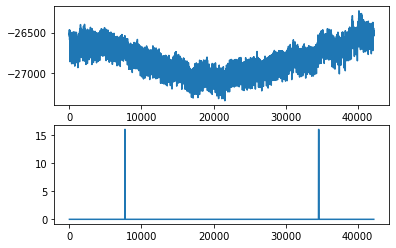

In [38]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(dataset[4]['ECG1'][:-250])
ax[1].plot(dataset[4]['status'][:-250])
plt.show()

In [3]:
# pandas dataframe storage
# Read file names
dataset_root = '/Users/Russel/myProjects/emotion-recognition/code/datasets/mahnob_hci/Sessions/'
dataset_path = Path(dataset_root)
dataset_dirs = sorted(os.listdir(dataset_root), key=int)
dataset_dirs = [dataset_path / dataset_dir for dataset_dir in dataset_dirs]

dataset = pd.DataFrame(columns=['ECG1', 'ECG2', 'ECG3', 'status', 'label', 'feltEmo', 'feltVlnc', 'feltArsl', 'feltCtrl', 'feltPred', 'subject', 'trial', 'bdf_file_path', 'session_file_path'])

bdf_file_pattern = re.compile('Part_(?P<subject>\d+)_S_Trial(?P<trial>\d+)_emotion')

for i, dataset_dir in enumerate(dataset_dirs):
    bdf_file = list(dataset_dir.glob("*.bdf"))
    if bdf_file:
        bdf_file = bdf_file[0]
        print(bdf_file.stem)
        session_file = list(dataset_dir.glob("*.xml"))[0]
        
        # Read signal
        f = pyedflib.EdfReader(str(bdf_file))
        sigbufs = np.zeros((4, f.getNSamples()[0]))
        sigbufs[0, :] = f.readSignal(32)
        sigbufs[1, :] = f.readSignal(33)
        sigbufs[2, :] = f.readSignal(34)
        sigbufs[3, :] = f.readSignal(46)
            
        # Read metadata
        m = bdf_file_pattern.match(bdf_file.stem)
        subject = m.groups()[0]
        trial = m.groups()[1]
        
        # Read labels
        root = ET.parse(session_file).getroot()
        
        # Append to dataset dataframe
        dataset.loc[i, 'ECG1'] = sigbufs[0]
        dataset.loc[i, 'ECG2'] = sigbufs[1]
        dataset.loc[i, 'ECG3'] = sigbufs[2]
        dataset.loc[i, 'status'] =  sigbufs[3]
        dataset.loc[i, 'label'] =  int(emotion_number_map[video_emotion_map[root.attrib['mediaFile']]])
        dataset.loc[i, 'feltEmo'] =  int(root.attrib['feltEmo'])
        dataset.loc[i, 'feltArsl'] =  int(root.attrib['feltArsl'])
        dataset.loc[i, 'feltVlnc'] =  int(root.attrib['feltVlnc'])
        dataset.loc[i, 'feltCtrl'] =  int(root.attrib['feltCtrl'])
        dataset.loc[i, 'feltPred'] =  int(root.attrib['feltPred'])
        dataset.loc[i, 'subject'] = subject
        dataset.loc[i, 'trial'] = trial
        dataset.loc[i, 'bdf_file_path'] = bdf_file.as_posix()
        dataset.loc[i, 'session_file_path'] = session_file.as_posix()

Part_1_S_Trial1_emotion
Part_1_S_Trial2_emotion
Part_1_S_Trial3_emotion
Part_1_S_Trial4_emotion
Part_1_S_Trial5_emotion
Part_1_S_Trial6_emotion
Part_1_S_Trial7_emotion
Part_1_S_Trial8_emotion
Part_1_S_Trial9_emotion
Part_1_S_Trial10_emotion
Part_1_S_Trial11_emotion
Part_1_S_Trial12_emotion
Part_1_S_Trial13_emotion
Part_1_S_Trial14_emotion
Part_1_S_Trial15_emotion
Part_1_S_Trial16_emotion
Part_1_S_Trial17_emotion
Part_1_S_Trial18_emotion
Part_1_S_Trial19_emotion
Part_1_S_Trial20_emotion
Part_2_S_Trial1_emotion
Part_2_S_Trial2_emotion
Part_2_S_Trial3_emotion
Part_2_S_Trial4_emotion
Part_2_S_Trial5_emotion
Part_2_S_Trial6_emotion
Part_2_S_Trial7_emotion
Part_2_S_Trial8_emotion
Part_2_S_Trial9_emotion
Part_2_S_Trial10_emotion
Part_2_S_Trial11_emotion
Part_2_S_Trial12_emotion
Part_2_S_Trial13_emotion
Part_2_S_Trial14_emotion
Part_2_S_Trial15_emotion
Part_2_S_Trial16_emotion
Part_2_S_Trial17_emotion
Part_2_S_Trial18_emotion
Part_2_S_Trial19_emotion
Part_2_S_Trial20_emotion
Part_3_S_Trial1_em

Part_20_S_Trial3_emotion
Part_20_S_Trial4_emotion
Part_20_S_Trial5_emotion
Part_20_S_Trial6_emotion
Part_20_S_Trial7_emotion
Part_20_S_Trial8_emotion
Part_20_S_Trial9_emotion
Part_20_S_Trial10_emotion
Part_20_S_Trial11_emotion
Part_20_S_Trial12_emotion
Part_20_S_Trial13_emotion
Part_20_S_Trial14_emotion
Part_20_S_Trial15_emotion
Part_20_S_Trial16_emotion
Part_20_S_Trial17_emotion
Part_20_S_Trial18_emotion
Part_20_S_Trial19_emotion
Part_20_S_Trial20_emotion
Part_21_S_Trial1_emotion
Part_21_S_Trial2_emotion
Part_21_S_Trial3_emotion
Part_21_S_Trial4_emotion
Part_21_S_Trial5_emotion
Part_21_S_Trial6_emotion
Part_21_S_Trial7_emotion
Part_21_S_Trial8_emotion
Part_21_S_Trial9_emotion
Part_21_S_Trial10_emotion
Part_21_S_Trial11_emotion
Part_21_S_Trial12_emotion
Part_21_S_Trial13_emotion
Part_21_S_Trial14_emotion
Part_21_S_Trial15_emotion
Part_21_S_Trial16_emotion
Part_21_S_Trial17_emotion
Part_21_S_Trial18_emotion
Part_21_S_Trial19_emotion
Part_21_S_Trial20_emotion
Part_22_S_Trial1_emotion
Par

In [8]:
len(dataset)

527

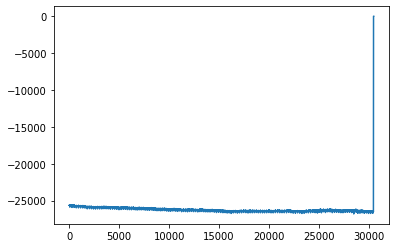

In [16]:
plt.plot(dataset.loc[0, :]['ECG1'][:-220])

In [6]:
dataset.loc[0, :]['session_file_path']

'/Users/Russel/myProjects/emotion-recognition/code/datasets/mahnob_hci/Sessions/2/session.xml'